In [1]:
from tensorflow.keras.models import load_model
from keras.metrics import Precision, Recall
import keras
from keras import metrics
import keras_metrics

/Users/haoyuzhang/anaconda3/envs/Kerasenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/haoyuzhang/anaconda3/envs/Kerasenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/haoyuzhang/anaconda3/envs/Kerasenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/haoyuzhang/anacond

## Keras Load Model

In [88]:
!pip install keras_metrics

In [98]:
model_path = './model/CNN_8COIN3Ccomb2_USD.h5'

# precision = keras.metrics.Precision
# precision.__name__ = 'precision'
# recall = keras.metrics.Recall
# recall.__name__ = 'recall'
# # b = keras.metrics.Recall
model = load_model(model_path, custom_objects={"precision":keras_metrics.precision(), "recall":keras_metrics.recall()})


tracking <tf.Variable 'Variable_16:0' shape=() dtype=int32> tp
tracking <tf.Variable 'Variable_17:0' shape=() dtype=int32> fp
tracking <tf.Variable 'Variable_18:0' shape=() dtype=int32> tp
tracking <tf.Variable 'Variable_19:0' shape=() dtype=int32> fn


TypeError: can only concatenate str (not "precision") to str

In [60]:
a.name

'precision'

In [77]:
a = keras.metrics.Precision(name='precision')
a.name

'precision'

In [79]:
from tensorflow.python.saved_model import loader_impl
from tensorflow.python.keras.saving.saved_model import load as saved_model_load

model_path = './model/CNN_8COIN3Ccomb2_USD.h5'
precision = keras.metrics.Precision
precision.__name__ = 'precision'
recall = keras.metrics.Recall
recall.__name__ = 'recall'
# # b = keras.metrics.Recall
# model = load_model(model_path, custom_objects={"Precision":precision, "Recall":recall})

loader_impl.parse_saved_model(model_path)
model = saved_model_load.load(model_path, custom_objects={"Precision":precision, "Recall":recall})

ImportError: cannot import name 'load' from 'tensorflow.python.keras.saving.saved_model' (/Users/haoyuzhang/anaconda3/envs/Kerasenv/lib/python3.7/site-packages/tensorflow/python/keras/saving/saved_model.py)

In [99]:
model_path = './model/CNN_8COIN3Ccomb2_USD.h5'
with CustomObjectScope({'precision': keras_metrics.precision(), 'recall':keras_metrics.recall()}):
    model = load_model(model_path)
    

tracking <tf.Variable 'Variable_20:0' shape=() dtype=int32> tp
tracking <tf.Variable 'Variable_21:0' shape=() dtype=int32> fp
tracking <tf.Variable 'Variable_22:0' shape=() dtype=int32> tp
tracking <tf.Variable 'Variable_23:0' shape=() dtype=int32> fn


In [100]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 10, 10, 32)        1184      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 32)          4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [97]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

## datatime

In [124]:
from datetime import datetime, timedelta
import pandas as pd

In [126]:
start_date = '2022-3-1'
end_date = '2022-2-20'

ed = int(datetime.strptime(end_date, '%Y-%m-%d').timestamp())
sd = int(datetime.strptime(start_date, '%Y-%m-%d').timestamp())

In [112]:
sd -  timedelta(days=7)

TypeError: unsupported operand type(s) for -: 'int' and 'datetime.timedelta'

In [107]:
sd - datetime.

1646114400

In [135]:
ed = datetime.now()

In [138]:
int(ed.timestamp())

1647067710

In [120]:
sd = ed - timedelta(days=7) 

In [130]:
ed 

datetime.datetime(2022, 3, 11, 23, 57, 31, 510337)

In [122]:
sd

datetime.datetime(2022, 3, 4, 22, 58, 20, 646457)

In [134]:
ed

datetime.datetime(2022, 3, 12, 0, 44, 51, 386749)

## Prediction csv read

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [3]:
df = pd.read_csv('./temp/DOT_USD_history.csv')
df.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,comments,...,reddit_comments_per_hour,reddit_comments_per_day,code_repo_stars,code_repo_forks,code_repo_subscribers,code_repo_open_pull_issues,code_repo_closed_pull_issues,code_repo_open_issues,code_repo_closed_issues,code_repo_contributors
0,2022-03-08 20:00:00,17.16,16.89,17.12,73181.38,1244442.09,16.98,direct,NaN,513560,...,262.97,6311.18,56870,29844,3845,401,15501,614,5826,1003
1,2022-03-08 21:00:00,16.98,16.78,16.98,47205.39,796512.71,16.81,direct,NaN,513577,...,173.33,4159.85,56870,29844,3845,401,15501,614,5826,1003
2,2022-03-08 22:00:00,16.92,16.80,16.81,28891.81,487316.63,16.84,direct,NaN,513611,...,150.56,3613.55,56870,29844,3845,401,15501,614,5826,1003
3,2022-03-08 23:00:00,16.99,16.81,16.84,30722.32,519363.05,16.99,direct,NaN,513632,...,143.88,3453.24,56870,29844,3845,401,15501,614,5826,1003
4,2022-03-09 00:00:00,17.10,16.89,16.99,48516.17,825902.63,17.08,direct,NaN,513633,...,181.09,4346.08,56870,29844,3845,401,15501,614,5826,1003


In [5]:
df.columns

Index(['time', 'high', 'low', 'open', 'volumefrom', 'volumeto', 'close',
       'conversionType', 'conversionSymbol', 'comments', 'posts', 'followers',
       'points', 'overview_page_views', 'analysis_page_views',
       'markets_page_views', 'charts_page_views', 'trades_page_views',
       'forum_page_views', 'influence_page_views', 'total_page_views',
       'fb_likes', 'fb_talking_about', 'twitter_followers',
       'twitter_following', 'twitter_lists', 'twitter_favourites',
       'twitter_statuses', 'reddit_subscribers', 'reddit_active_users',
       'reddit_posts_per_hour', 'reddit_posts_per_day',
       'reddit_comments_per_hour', 'reddit_comments_per_day',
       'code_repo_stars', 'code_repo_forks', 'code_repo_subscribers',
       'code_repo_open_pull_issues', 'code_repo_closed_pull_issues',
       'code_repo_open_issues', 'code_repo_closed_issues',
       'code_repo_contributors'],
      dtype='object')

In [29]:
predict = np.random.randint(2, size =160)
predict = np.append(b, predict)

In [24]:
b = np.empty(9)
b[:] = np.nan

In [30]:
predict 

array([nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.,  0.,  0.,  0.,
        1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
        1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,
        0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
        0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.])

In [16]:
df['predict'] = ''

In [32]:
df['predict'] = predict

In [33]:
df['predict']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
164    0.0
165    1.0
166    0.0
167    0.0
168    0.0
Name: predict, Length: 169, dtype: float64

In [39]:
df = pd.read_csv('./temp/DOT_USD_result.csv')

In [41]:
df.set_index('time')

,open,high,close,low,volumeto,reddit_active_users,reddit_posts_per_hour,posts,total_page_views,predict
time,,,,,,,,,,
2022-03-09 00:00:00,16.99,17.10,17.08,16.89,825902.63,2543,4.10,150898,64013693,NaN
2022-03-09 01:00:00,17.08,17.44,17.42,17.06,1506578.54,2543,4.04,150899,64013988,NaN
2022-03-09 02:00:00,17.42,17.46,17.32,17.27,1231220.83,2543,3.87,150903,64014246,NaN
2022-03-09 03:00:00,17.32,17.80,17.71,17.28,2678400.81,2543,3.75,150905,64014557,NaN
2022-03-09 04:00:00,17.71,17.83,17.77,17.70,1967759.82,2543,3.84,150907,64015059,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-03-15 20:00:00,17.95,18.02,17.85,17.83,1065180.74,2543,3.79,151104,64087777,1.0
2022-03-15 21:00:00,17.85,17.93,17.93,17.76,1045832.00,2543,3.76,151105,64088317,2.0
2022-03-15 22:00:00,17.93,18.04,17.86,17.84,708537.67,2543,3.69,151107,64088808,2.0


<AxesSubplot:>

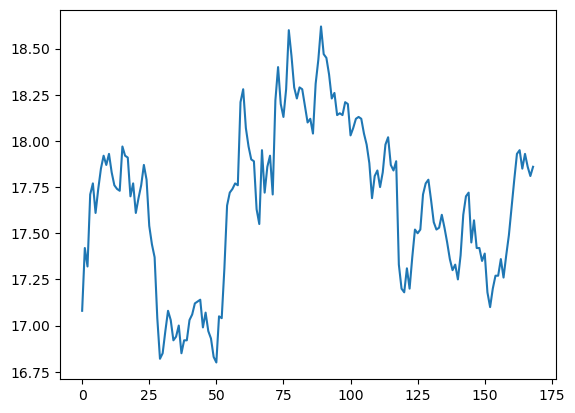

In [46]:
df['close'].plot()

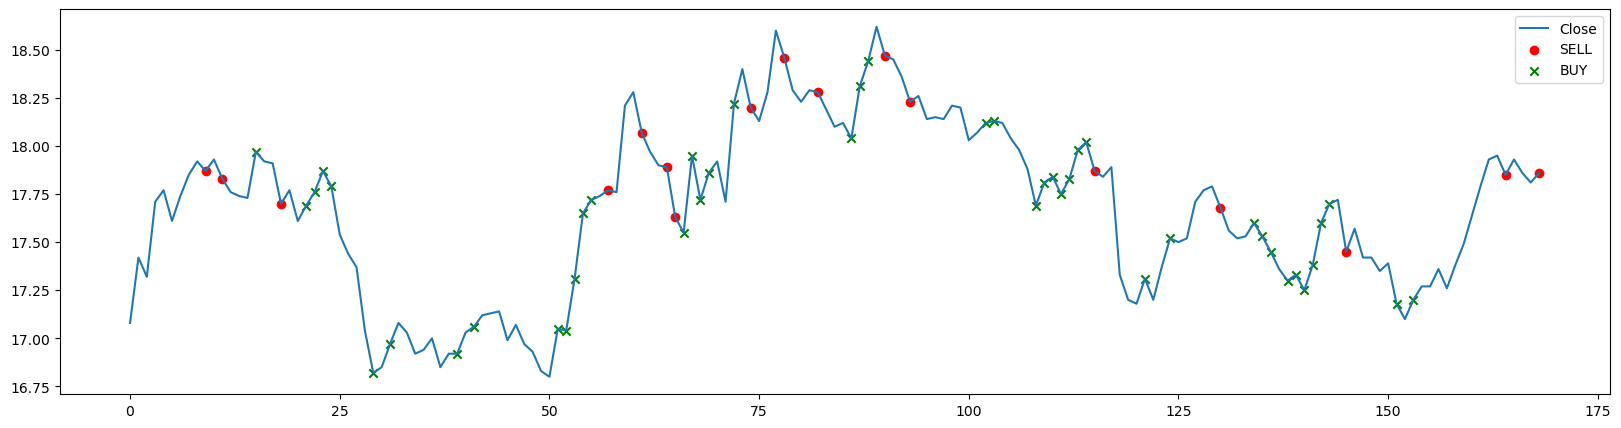

In [68]:
plt.figure(figsize=(20,5))
plt.plot(df.close, label='Close')
plt.scatter(df[df['predict']==1].index, df[df['predict']==1].close, label = "SELL", c='red')
plt.scatter(df[df['predict']==0].index, df[df['predict']==0].close, label = "BUY", c='green', marker='x')

plt.legend()
plt.show()

In [63]:
df[df['predict']==1].close

9      17.87
11     17.83
18     17.70
57     17.77
61     18.07
64     17.89
65     17.63
74     18.20
78     18.46
82     18.28
90     18.47
93     18.23
115    17.87
130    17.68
145    17.45
164    17.85
168    17.86
Name: close, dtype: float64

In [69]:
df

,time,open,high,close,low,volumeto,reddit_active_users,reddit_posts_per_hour,posts,total_page_views,predict
0,2022-03-09 00:00:00,16.99,17.10,17.08,16.89,825902.63,2543,4.10,150898,64013693,NaN
1,2022-03-09 01:00:00,17.08,17.44,17.42,17.06,1506578.54,2543,4.04,150899,64013988,NaN
2,2022-03-09 02:00:00,17.42,17.46,17.32,17.27,1231220.83,2543,3.87,150903,64014246,NaN
3,2022-03-09 03:00:00,17.32,17.80,17.71,17.28,2678400.81,2543,3.75,150905,64014557,NaN
4,2022-03-09 04:00:00,17.71,17.83,17.77,17.70,1967759.82,2543,3.84,150907,64015059,NaN
...,...,...,...,...,...,...,...,...,...,...,...
164,2022-03-15 20:00:00,17.95,18.02,17.85,17.83,1065180.74,2543,3.79,151104,64087777,1.0
165,2022-03-15 21:00:00,17.85,17.93,17.93,17.76,1045832.00,2543,3.76,151105,64088317,2.0
166,2022-03-15 22:00:00,17.93,18.04,17.86,17.84,708537.67,2543,3.69,151107,64088808,2.0
167,2022-03-15 23:00:00,17.86,17.91,17.81,17.79,460877.43,2543,3.69,151076,64089252,2.0


In [7]:
df = pd.read_csv('./temp/ETH_USD_result.csv')
df.tail(10)

,time,open,high,close,low,volumeto,reddit_active_users,reddit_posts_per_hour,posts,total_page_views,predict,extra_predict
159,2022-03-15 20:00:00,2658.43,2668.80,2626.19,2624.04,5.693220e+07,2543,3.79,151104,64087777,1.0,2.0
160,2022-03-15 21:00:00,2626.19,2634.71,2633.84,2610.87,3.570598e+07,2543,3.76,151105,64088317,1.0,1.0
161,2022-03-15 22:00:00,2633.84,2642.74,2624.75,2621.30,1.724082e+07,2543,3.69,151107,64088808,2.0,2.0
162,2022-03-15 23:00:00,2624.75,2631.44,2619.61,2618.16,1.722352e+07,2543,3.69,151076,64089252,2.0,2.0
163,2022-03-16 00:00:00,2619.61,2628.60,2612.28,2607.23,2.079952e+07,2543,3.70,151076,64089606,2.0,1.0
164,2022-03-16 01:00:00,2612.28,2648.27,2645.39,2610.03,2.457300e+07,2543,3.70,151076,64089880,2.0,2.0
165,2022-03-16 02:00:00,2645.39,2710.03,2691.65,2642.77,1.113743e+08,2543,3.73,151076,64090139,0.0,0.0
166,2022-03-16 03:00:00,2691.65,2692.90,2622.97,2615.72,8.711213e+07,2543,4.39,151077,64090693,1.0,1.0
167,2022-03-16 04:00:00,2623.11,2628.95,2621.12,2618.38,1.698795e+07,2543,4.49,151078,64091157,2.0,2.0
168,2022-03-16 05:00:00,2620.67,2631.18,2627.57,2615.73,3.195878e+07,2543,4.30,151078,64091522,2.0,2.0


In [8]:
df['predict1'] = df['predict']

In [9]:
df.tail(10)

,time,open,high,close,low,volumeto,reddit_active_users,reddit_posts_per_hour,posts,total_page_views,predict,extra_predict,predict1
159,2022-03-15 20:00:00,2658.43,2668.80,2626.19,2624.04,5.693220e+07,2543,3.79,151104,64087777,1.0,2.0,1.0
160,2022-03-15 21:00:00,2626.19,2634.71,2633.84,2610.87,3.570598e+07,2543,3.76,151105,64088317,1.0,1.0,1.0
161,2022-03-15 22:00:00,2633.84,2642.74,2624.75,2621.30,1.724082e+07,2543,3.69,151107,64088808,2.0,2.0,2.0
162,2022-03-15 23:00:00,2624.75,2631.44,2619.61,2618.16,1.722352e+07,2543,3.69,151076,64089252,2.0,2.0,2.0
163,2022-03-16 00:00:00,2619.61,2628.60,2612.28,2607.23,2.079952e+07,2543,3.70,151076,64089606,2.0,1.0,2.0
164,2022-03-16 01:00:00,2612.28,2648.27,2645.39,2610.03,2.457300e+07,2543,3.70,151076,64089880,2.0,2.0,2.0
165,2022-03-16 02:00:00,2645.39,2710.03,2691.65,2642.77,1.113743e+08,2543,3.73,151076,64090139,0.0,0.0,0.0
166,2022-03-16 03:00:00,2691.65,2692.90,2622.97,2615.72,8.711213e+07,2543,4.39,151077,64090693,1.0,1.0,1.0
167,2022-03-16 04:00:00,2623.11,2628.95,2621.12,2618.38,1.698795e+07,2543,4.49,151078,64091157,2.0,2.0,2.0
168,2022-03-16 05:00:00,2620.67,2631.18,2627.57,2615.73,3.195878e+07,2543,4.30,151078,64091522,2.0,2.0,2.0


In [20]:
def filter_predict(p,pe):
    
    if p == 0 and pe == 0:
        return 0
    elif p == 1 and pe == 1:
        return 1
    else:
        return 2

df['predict'] = df.apply(lambda x: filter_predict(x.predict, x.extra_predict), axis=1)

In [21]:
df

,time,open,high,close,low,volumeto,reddit_active_users,reddit_posts_per_hour,posts,total_page_views,predict,extra_predict,predict1,col_3,col_4
0,2022-03-09 05:00:00,2719.94,2724.62,2715.09,2707.29,4.064853e+07,2543,3.84,150909,64015735,2.0,NaN,NaN,2.0,2.0
1,2022-03-09 06:00:00,2715.09,2726.61,2723.70,2707.94,2.204998e+07,2543,3.92,150912,64016270,2.0,NaN,NaN,2.0,2.0
2,2022-03-09 07:00:00,2723.70,2747.51,2746.45,2718.30,3.723415e+07,2543,4.29,150913,64016936,2.0,NaN,NaN,2.0,2.0
3,2022-03-09 08:00:00,2746.45,2764.71,2759.13,2728.98,4.000539e+07,2543,4.46,150914,64017585,2.0,NaN,NaN,2.0,2.0
4,2022-03-09 09:00:00,2759.13,2767.00,2755.04,2753.96,1.828010e+07,2543,4.47,150919,64018370,2.0,NaN,NaN,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2022-03-16 01:00:00,2612.28,2648.27,2645.39,2610.03,2.457300e+07,2543,3.70,151076,64089880,2.0,2.0,2.0,2.0,2.0
165,2022-03-16 02:00:00,2645.39,2710.03,2691.65,2642.77,1.113743e+08,2543,3.73,151076,64090139,0.0,0.0,0.0,0.0,0.0
166,2022-03-16 03:00:00,2691.65,2692.90,2622.97,2615.72,8.711213e+07,2543,4.39,151077,64090693,1.0,1.0,1.0,1.0,1.0
167,2022-03-16 04:00:00,2623.11,2628.95,2621.12,2618.38,1.698795e+07,2543,4.49,151078,64091157,2.0,2.0,2.0,2.0,2.0


In [22]:
df['predict'].equals(df['col_3'])

True

In [23]:
df['predict'].equals(df['extra_predict'])

False

In [24]:
df['predict'].equals(df['predict1'])

False

## Display 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
plt.style.use('default')

In [3]:
df = pd.read_csv('./temp/BTC_USD_result.csv')
df.tail(10)

,time,open,high,close,low,volumeto,reddit_active_users,reddit_posts_per_hour,posts,total_page_views,predict,extra_predict
63,2022-03-15 21:00:00,39447.32,39674.94,39672.25,39368.48,3.169065e+07,2543,3.76,151105,64088317,2,2.0
64,2022-03-15 22:00:00,39672.25,39859.45,39499.16,39444.27,4.305845e+07,2543,3.69,151107,64088808,2,2.0
65,2022-03-15 23:00:00,39499.16,39566.90,39314.86,39311.38,3.080140e+07,2543,3.69,151076,64089252,2,2.0
66,2022-03-16 00:00:00,39314.86,39432.24,39186.67,39153.19,4.153227e+07,2543,3.70,151076,64089606,2,2.0
67,2022-03-16 01:00:00,39186.67,39586.52,39532.45,39128.30,3.721788e+07,2543,3.70,151076,64089880,2,2.0
68,2022-03-16 02:00:00,39532.45,41638.54,40867.49,39507.68,3.440987e+08,2543,3.73,151076,64090139,0,0.0
69,2022-03-16 03:00:00,40867.49,40926.83,39191.91,38933.24,1.816582e+08,2543,4.39,151077,64090693,1,1.0
70,2022-03-16 04:00:00,39191.91,39212.88,39150.47,38986.96,2.760585e+07,2543,4.49,151078,64091157,2,2.0
71,2022-03-16 05:00:00,39150.47,39405.96,39337.83,39023.74,2.857882e+07,2543,4.30,151078,64091522,2,2.0
72,2022-03-16 06:00:00,39337.83,39582.45,39551.97,39305.92,5.534248e+07,2543,4.12,151080,64091922,2,0.0


In [13]:
df.dtypes

time                      object
open                     float64
high                     float64
close                    float64
low                      float64
volumeto                 float64
reddit_active_users        int64
reddit_posts_per_hour    float64
posts                      int64
total_page_views           int64
predict                    int64
extra_predict            float64
dtype: object

In [14]:
df.time

0     2022-03-13 06:00:00
1     2022-03-13 07:00:00
2     2022-03-13 08:00:00
3     2022-03-13 09:00:00
4     2022-03-13 10:00:00
             ...         
68    2022-03-16 02:00:00
69    2022-03-16 03:00:00
70    2022-03-16 04:00:00
71    2022-03-16 05:00:00
72    2022-03-16 06:00:00
Name: time, Length: 73, dtype: object

In [18]:
df.iloc[0].time

'2022-03-13 06:00:00'

In [23]:
datetime_object = datetime.strptime(df.iloc[0].time, '%Y-%m-%d %H:%M:%S')

In [24]:
datetime_object

datetime.datetime(2022, 3, 13, 6, 0)

In [25]:
df['datatime'] = df['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [26]:
df['datatime']

0    2022-03-13 06:00:00
1    2022-03-13 07:00:00
2    2022-03-13 08:00:00
3    2022-03-13 09:00:00
4    2022-03-13 10:00:00
             ...        
68   2022-03-16 02:00:00
69   2022-03-16 03:00:00
70   2022-03-16 04:00:00
71   2022-03-16 05:00:00
72   2022-03-16 06:00:00
Name: datatime, Length: 73, dtype: datetime64[ns]

In [27]:
df= df.set_index('datatime')

In [28]:
df

,time,open,high,close,low,volumeto,reddit_active_users,reddit_posts_per_hour,posts,total_page_views,predict,extra_predict
datatime,,,,,,,,,,,,
2022-03-13 06:00:00,2022-03-13 06:00:00,39128.41,39176.69,39155.27,39087.76,1.129501e+07,2543,3.04,151017,64060912,2,NaN
2022-03-13 07:00:00,2022-03-13 07:00:00,39155.27,39186.06,39084.50,39076.28,1.225947e+07,2543,2.94,151017,64061172,2,NaN
2022-03-13 08:00:00,2022-03-13 08:00:00,39084.50,39125.25,39078.38,39029.68,1.386701e+07,2543,2.94,151018,64061522,2,NaN
2022-03-13 09:00:00,2022-03-13 09:00:00,39078.38,39097.67,38942.28,38914.81,3.204792e+07,2543,2.82,151020,64061876,2,NaN
2022-03-13 10:00:00,2022-03-13 10:00:00,38942.28,39013.67,38997.60,38877.18,1.602316e+07,2543,2.75,151022,64062249,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-16 02:00:00,2022-03-16 02:00:00,39532.45,41638.54,40867.49,39507.68,3.440987e+08,2543,3.73,151076,64090139,0,0.0
2022-03-16 03:00:00,2022-03-16 03:00:00,40867.49,40926.83,39191.91,38933.24,1.816582e+08,2543,4.39,151077,64090693,1,1.0
2022-03-16 04:00:00,2022-03-16 04:00:00,39191.91,39212.88,39150.47,38986.96,2.760585e+07,2543,4.49,151078,64091157,2,2.0


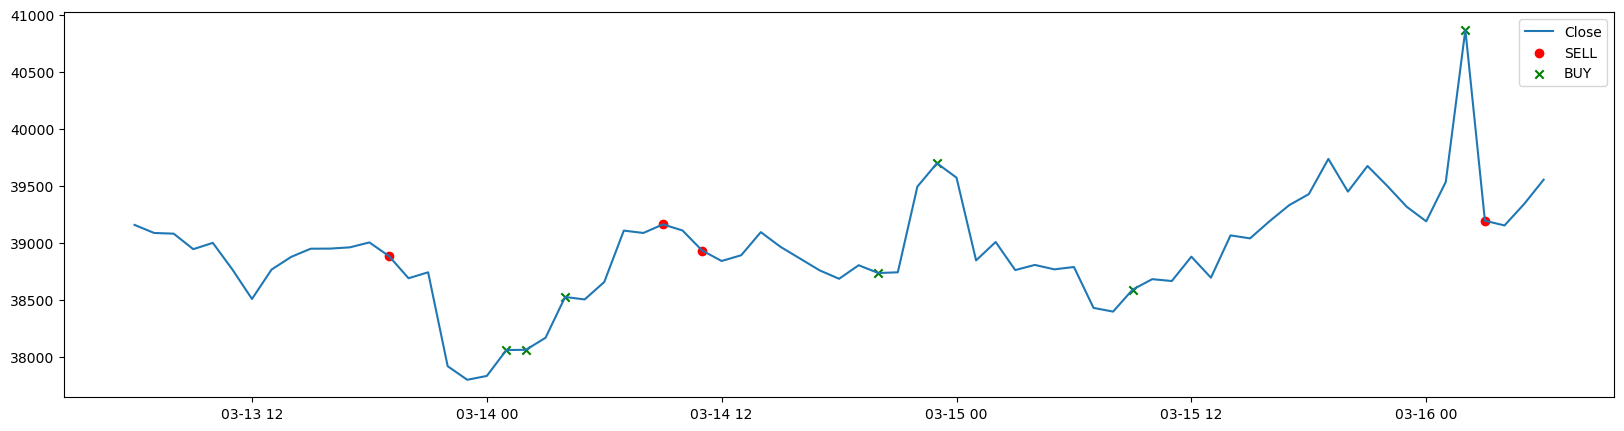

In [29]:
plt.figure(figsize=(20,5))
plt.plot(df.close, label='Close')
plt.scatter(df[df['predict']==1].index, df[df['predict']==1].close, label = "SELL", c='red')
plt.scatter(df[df['predict']==0].index, df[df['predict']==0].close, label = "BUY", c='green', marker='x')

plt.legend()
plt.show()

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [3]:
with open('./gasf_arr/gasf_arr_5COIN3C1_USD', mode='rb') as f:
    a = pickle.load(f)
    print(a.shape)

(3, 806, 10, 10, 9)


In [6]:
a[1,1,:,:,1].shape

(10, 10)

(-0.5, 9.5, 9.5, -0.5)

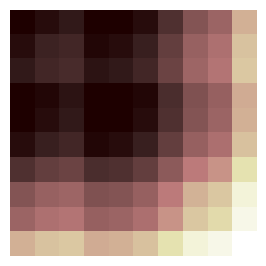

In [18]:
fig = plt.figure(figsize=(6, 3.2))
ax = fig.add_subplot(111)
plt.imshow(a[1,1,:,:,1])
ax.set_aspect('equal')
plt.set_cmap('pink')
plt.axis('off')

##  Join news 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./news_history.csv')
df.head()

,Unnamed: 0,date,hour,sentiment,rank_score,sentimenttitle,sentimenttext,datetime
0,0,2020-04-12,11,0.0,2.71,0.0,0.0,2020-04-12 11:00:00
1,1,2020-04-12,13,1.5,2.73,0.0,0.5,2020-04-12 13:00:00
2,2,2020-04-12,14,0.0,4.74,0.0,0.0,2020-04-12 14:00:00
3,3,2020-04-12,16,2.0,4.29,0.0,0.0,2020-04-12 16:00:00
4,4,2020-05-11,19,0.0,2.96,0.0,0.0,2020-05-11 19:00:00


In [3]:
df.columns

Index(['Unnamed: 0', 'date', 'hour', 'sentiment', 'rank_score',
       'sentimenttitle', 'sentimenttext', 'datetime'],
      dtype='object')

In [4]:
df = df[['sentiment', 'rank_score', 'datetime']]

In [5]:
df_0 = pd.read_csv('./csv/BTC_USD_history.csv')

In [6]:
df_0.shape

(26165, 42)

In [7]:
df_0 = df_0[['time', 'high', 'low', 'open', 'volumeto', 'close']]

In [8]:
df_0.columns

Index(['time', 'high', 'low', 'open', 'volumeto', 'close'], dtype='object')

In [20]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26165 entries, 0 to 26164
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      26165 non-null  object 
 1   high      26165 non-null  float64
 2   low       26165 non-null  float64
 3   open      26165 non-null  float64
 4   volumeto  26165 non-null  float64
 5   close     26165 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.2+ MB


In [9]:
df_join = df_0.set_index('time').join(df.set_index('datetime'))

In [11]:
#df_join[df_join.index >= df_join[df_join['sentiment'].notna()].index[0]]

first_row = df_join[df_join['sentiment'].notna()].index[0]

df_filter = df_join[df_join.index >= first_row]

df_filter.shape

(16658, 7)

In [13]:
first_row = df_join[df_join['sentiment'].notna()].index[0]
last_row = df_join[df_join['sentiment'].notna()].index[-1]

df_filter = df_join[(df_join.index >= first_row) & (df_join.index <=last_row)]

df_filter.shape

(16651, 7)

In [14]:
df_filter.tail()

,high,low,open,volumeto,close,sentiment,rank_score
2022-02-28 19:00:00,41377.67,41057.84,41217.44,8.271987e+07,41357.77,1.0,3.890
2022-02-28 20:00:00,41921.89,41337.05,41357.77,1.511996e+08,41857.74,NaN,NaN
2022-02-28 21:00:00,41886.55,41534.64,41857.74,5.448772e+07,41647.43,NaN,NaN
2022-02-28 22:00:00,43953.92,41647.43,41647.43,2.728442e+08,43277.47,NaN,NaN
2022-02-28 23:00:00,43390.76,42916.86,43277.47,1.178861e+08,43189.46,0.4,4.312


In [58]:
df_filter.fillna(method="ffill")

,high,low,open,volumeto,close,sentiment,rank_score
2020-04-12 11:00:00,6896.96,6856.86,6857.35,4524636.78,6871.61,0.0,2.710
2020-04-12 12:00:00,6946.87,6868.86,6871.61,12171483.32,6921.50,0.0,2.710
2020-04-12 13:00:00,6940.04,6907.49,6921.50,7026273.64,6929.44,1.5,2.730
2020-04-12 14:00:00,7033.23,6929.40,6929.44,31501596.44,6990.20,0.0,4.740
2020-04-12 15:00:00,7044.59,6990.20,6990.20,18109236.53,7034.90,0.0,4.740
...,...,...,...,...,...,...,...
2022-03-01 02:00:00,43312.65,43020.79,43279.82,57666842.44,43187.19,0.4,4.312
2022-03-01 03:00:00,43191.43,42893.50,43187.19,51039276.48,43170.30,0.4,4.312
2022-03-01 04:00:00,43403.57,43104.36,43170.30,45765588.57,43365.35,0.4,4.312
2022-03-01 05:00:00,43407.97,43171.73,43365.35,30986829.91,43227.72,0.4,4.312


In [18]:
df_filter['sentiment'].isna().sum()

13040

In [23]:
df_filter.index.name = 'time'

In [24]:
df_filter

,high,low,open,volumeto,close,sentiment,rank_score
time,,,,,,,
2020-04-12 11:00:00,6896.96,6856.86,6857.35,4.524637e+06,6871.61,0.0,2.710
2020-04-12 12:00:00,6946.87,6868.86,6871.61,1.217148e+07,6921.50,NaN,NaN
2020-04-12 13:00:00,6940.04,6907.49,6921.50,7.026274e+06,6929.44,1.5,2.730
2020-04-12 14:00:00,7033.23,6929.40,6929.44,3.150160e+07,6990.20,0.0,4.740
2020-04-12 15:00:00,7044.59,6990.20,6990.20,1.810924e+07,7034.90,NaN,NaN
...,...,...,...,...,...,...,...
2022-02-28 19:00:00,41377.67,41057.84,41217.44,8.271987e+07,41357.77,1.0,3.890
2022-02-28 20:00:00,41921.89,41337.05,41357.77,1.511996e+08,41857.74,NaN,NaN
2022-02-28 21:00:00,41886.55,41534.64,41857.74,5.448772e+07,41647.43,NaN,NaN


## Confusion Matrix Display

In [ ]:
!pip install pretty-confusion-matrix

     |████████████████████████████████| 156 kB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 73 kB 5.8 MB/s  eta 0:00:01
     |████████████████████████████████| 103 kB 25.1 MB/s eta 0:00:01
     |████████████████████████████████| 7.3 MB 25.1 MB/s eta 0:00:01
     |████████████████████████████████| 899 kB 38.2 MB/s eta 0:00:01
  Using cached numpy-1.21.5-cp37-cp37m-macosx_10_9_x86_64.whl (16.9 MB)
  Using cached pandas-1.3.5-cp37-cp37m-macosx_10_9_x86_64.whl (11.0 MB)
     |████████████████████████████████| 197 kB 34.2 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 16.5 MB/s eta 0:00:01
     |████████████████████████████████| 41 kB 278 kB/s eta 0:00:011
     |████████████████████████████████| 68 kB 8.5 MB/s  eta 0:00:01
     |████████████████████████████████| 292 kB 16.9 MB/s eta 0:00:01
     |████████████████████████████████| 221 kB 36.8 MB/s eta 0:00:01
  Using cached typing_extensions-4.1.1-py3-none-any.whl (26 kB)
     |███████████████████████████████

In [ ]:
import numpy as np
import pandas as pd
from pretty_confusion_matrix import pp_matrix

array = np.array([[13,  0,  1,  0,  2,  0],
                  [0, 50,  2,  0, 10,  0],
                  [0, 13, 16,  0,  0,  3],
                  [0,  0,  0, 13,  1,  0],
                  [0, 40,  0,  1, 15,  0],
                  [0,  0,  0,  0,  0, 20]])

# get pandas dataframe
df_cm = pd.DataFrame(array, index=range(1, 7), columns=range(1, 7))
# colormap: see this and choose your more dear
cmap = 'PuRd'
pp_matrix(df_cm, cmap=cmap)

In [ ]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpl_dates

plt.style.use('ggplot')

# Extracting Data for plotting
data = pd.read_csv('/temp/ETH_USD_result.csv')
ohlc = data.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of NIFTY50')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()

## Candlestick Display

In [20]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpl_dates
from datetime import datetime
import numpy as np

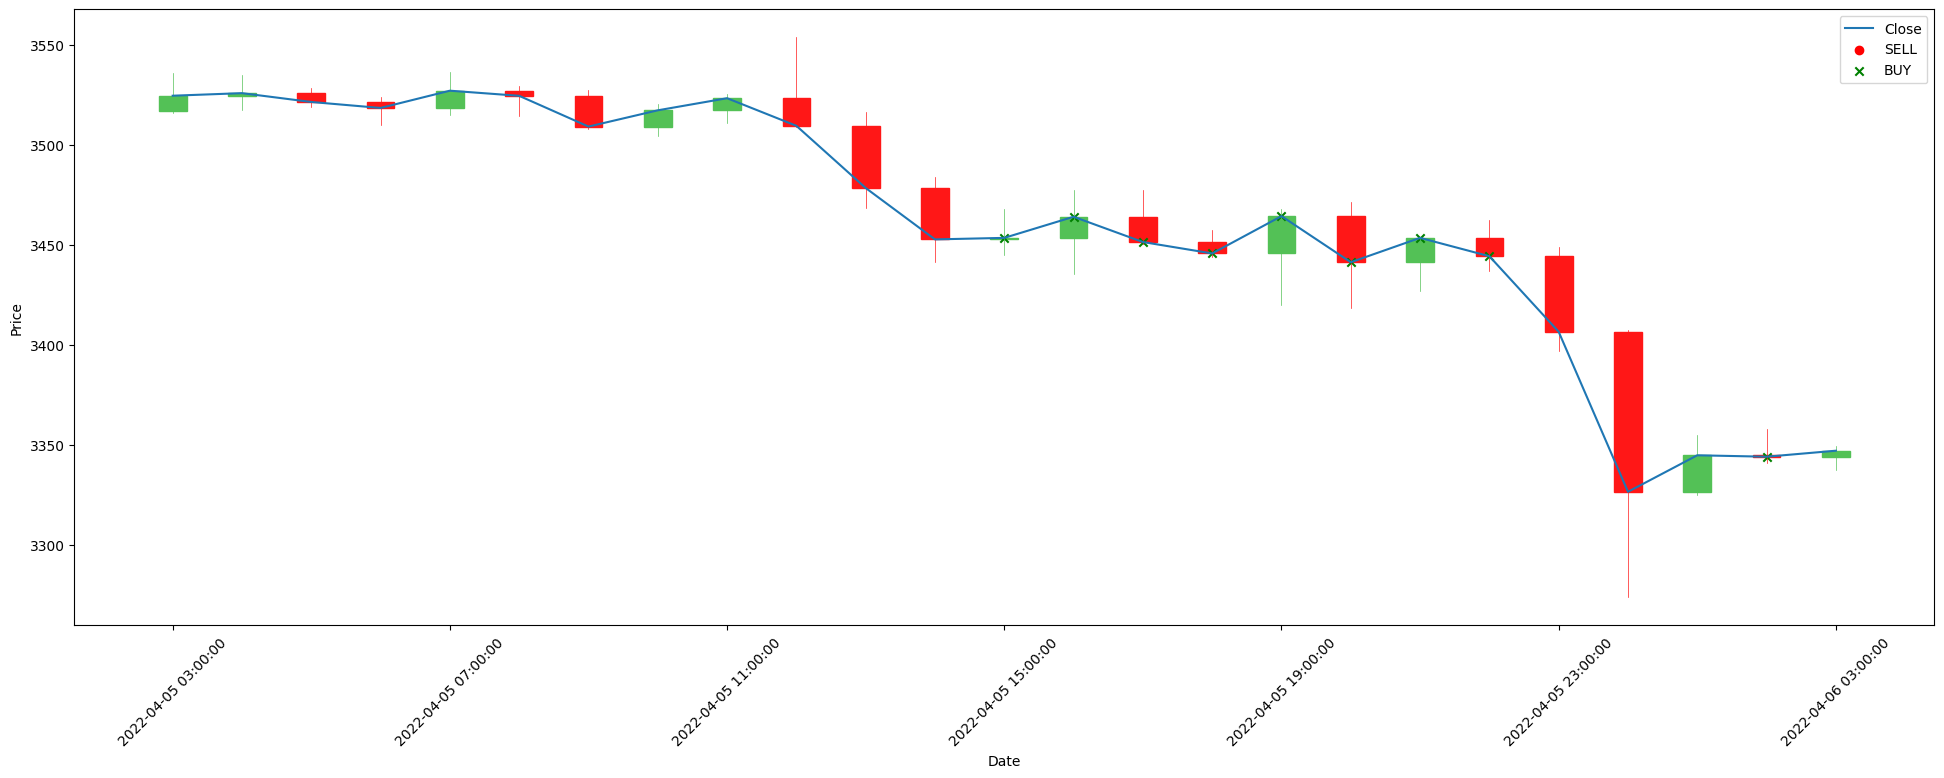

In [114]:
plt.style.use('default')
fig = plt.figure(figsize=(24, 8))
ax = plt.subplot2grid((1, 1), (0, 0))     

df = pd.read_csv('./temp/ETH_USD_result.csv')
ohlc = df.loc[:, ['time', 'open', 'high', 'low', 'close']]


ohlc['datetime'] = ohlc['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

# ohlc['date'] = pd.to_datetime(ohlc['time'])
#ohlc['date'] = ohlc['date'].apply(mpl_dates.date2num)
    
arr = np.c_[range(ohlc.shape[0]), ohlc[['open', 'high', 'low', 'close']].values]
candlestick_ohlc(ax, arr, width=0.4, alpha=1, colordown='#ff1717', colorup='#53c156')
# ohlc['date'] = pd.to_datetime(ohlc['time'])
# ohlc['date'] = ohlc['date'].apply(mpl_dates.date2num)
# arr = ohlc[['date','open', 'high', 'low', 'close']].astype(float)

# candlestick_ohlc(ax, arr.values, width=0.4, alpha=1, colordown='#ff1717', colorup='#53c156')

ax.set_xlabel('Date')
ax.set_ylabel('Price')

date_str = ohlc['time'].tolist()

# Create custom x ticks and tick labels
freq = 4 # business days

plt.xticks(range(ohlc.shape[0])[::freq], date_str[::freq])
plt.xticks(rotation = 45)


plt.plot(df.close, label='Close')

plt.scatter(df[df['predict'] == 1].index, df[df['predict'] == 1].close, label="SELL", c='red')
plt.scatter(df[df['predict'] == 0].index, df[df['predict'] == 0].close, label="BUY", c='green', marker='x')



plt.legend()
    
plt.show()

In [97]:
data_str = ohlc['time'].tolist()

In [98]:
data_str

['2022-04-05 03:00:00',
 '2022-04-05 04:00:00',
 '2022-04-05 05:00:00',
 '2022-04-05 06:00:00',
 '2022-04-05 07:00:00',
 '2022-04-05 08:00:00',
 '2022-04-05 09:00:00',
 '2022-04-05 10:00:00',
 '2022-04-05 11:00:00',
 '2022-04-05 12:00:00',
 '2022-04-05 13:00:00',
 '2022-04-05 14:00:00',
 '2022-04-05 15:00:00',
 '2022-04-05 16:00:00',
 '2022-04-05 17:00:00',
 '2022-04-05 18:00:00',
 '2022-04-05 19:00:00',
 '2022-04-05 20:00:00',
 '2022-04-05 21:00:00',
 '2022-04-05 22:00:00',
 '2022-04-05 23:00:00',
 '2022-04-06 00:00:00',
 '2022-04-06 01:00:00',
 '2022-04-06 02:00:00',
 '2022-04-06 03:00:00']

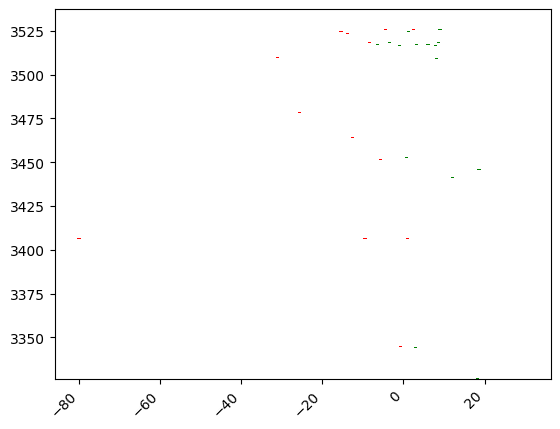

In [89]:
import matplotlib.pyplot as plt

data = pd.read_csv('./temp/ETH_USD_result.csv')
prices = data.loc[:, ['time', 'open', 'high', 'low', 'close']]

prices['datetime'] = prices['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
prices = prices.set_index('datetime')

#create figure
plt.figure()

#define width of candlestick elements
width = .4
width2 = .05

#define up and down prices
up = prices[prices.close>=prices.open]
down = prices[prices.close<prices.open]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.close-up.open,width,bottom=up.open,color=col1)
plt.bar(up.high-up.close,width2,bottom=up.close,color=col1)
plt.bar(up.low-up.open,width2,bottom=up.open,color=col1)

#plot down prices
plt.bar(down.close-down.open,width,bottom=down.open,color=col2)
plt.bar(down.high-down.open,width2,bottom=down.open,color=col2)
plt.bar(down.low-down.close,width2,bottom=down.close,color=col2)

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

#display candlestick chart
plt.show()

In [120]:
data = pd.read_csv('./temp/ETH_USD_result.csv')
prices = data.loc[:, ['time', 'open', 'high', 'low', 'close']]

prices['datetime'] = prices['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
prices = prices.set_index('datetime')

In [124]:
prices['close']

datetime
2022-04-05 03:00:00    3524.46
2022-04-05 04:00:00    3525.74
2022-04-05 05:00:00    3521.33
2022-04-05 06:00:00    3518.34
2022-04-05 07:00:00    3526.97
2022-04-05 08:00:00    3524.41
2022-04-05 09:00:00    3509.04
2022-04-05 10:00:00    3517.16
2022-04-05 11:00:00    3523.21
2022-04-05 12:00:00    3509.42
2022-04-05 13:00:00    3478.34
2022-04-05 14:00:00    3452.64
2022-04-05 15:00:00    3453.40
2022-04-05 16:00:00    3463.95
2022-04-05 17:00:00    3451.33
2022-04-05 18:00:00    3445.62
2022-04-05 19:00:00    3464.27
2022-04-05 20:00:00    3441.23
2022-04-05 21:00:00    3453.40
2022-04-05 22:00:00    3444.23
2022-04-05 23:00:00    3406.48
2022-04-06 00:00:00    3326.49
2022-04-06 01:00:00    3344.73
2022-04-06 02:00:00    3344.02
2022-04-06 03:00:00    3347.02
Name: close, dtype: float64

In [132]:
prices[prices['close']>3400].index[-1] 

Timestamp('2022-04-05 23:00:00')

In [130]:
prices[prices['close']<3400].index[-1]

Timestamp('2022-04-06 03:00:00')

In [133]:
prices[prices['close']>3400].index[-1] < prices[prices['close']<3400].index[-1]

True

In [137]:
prices[prices.index == prices[prices['close']<3400].index[-1]]

,time,open,high,low,close
datetime,,,,,
2022-04-06 03:00:00,2022-04-06 03:00:00,3344.02,3349.32,3337.19,3347.02
